## Decision Trees and Random Forest

Bootcamp: https://github.com/SuvroBaner/Python-for-Data-Science-and-Machine-Learning-Bootcamp/blob/master/13.%20Decision-Trees-and-Random-Forests/Decision%20Trees%20and%20Random%20Forests%20in%20Python.ipynb

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

%matplotlib inline

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Check out the Data

In [2]:
# Importing DataFrame

df = pd.read_csv("kyphosis.csv")

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [8]:
# Creation of the Report with Pandas Profiling
profile = ProfileReport(df)
profile.to_file("df_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/francisco/anaconda3/envs/Handbook_Python_DS/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### Check for missing values

Text(0.5, 1.0, 'Missing values in the dataset')

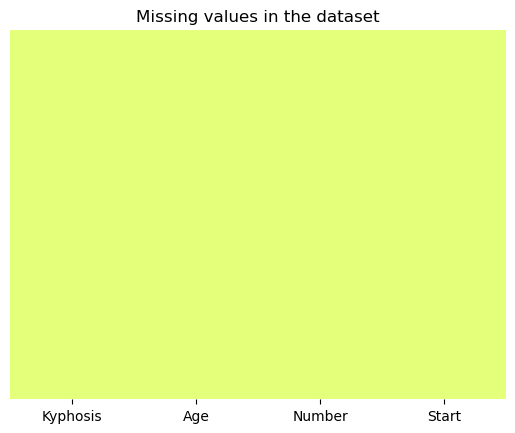

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap="Wistia", yticklabels=False)
plt.title("Missing values in the dataset")

We observe that are not missing values in the dataset

## Exploratory Data Analysis (EDA)

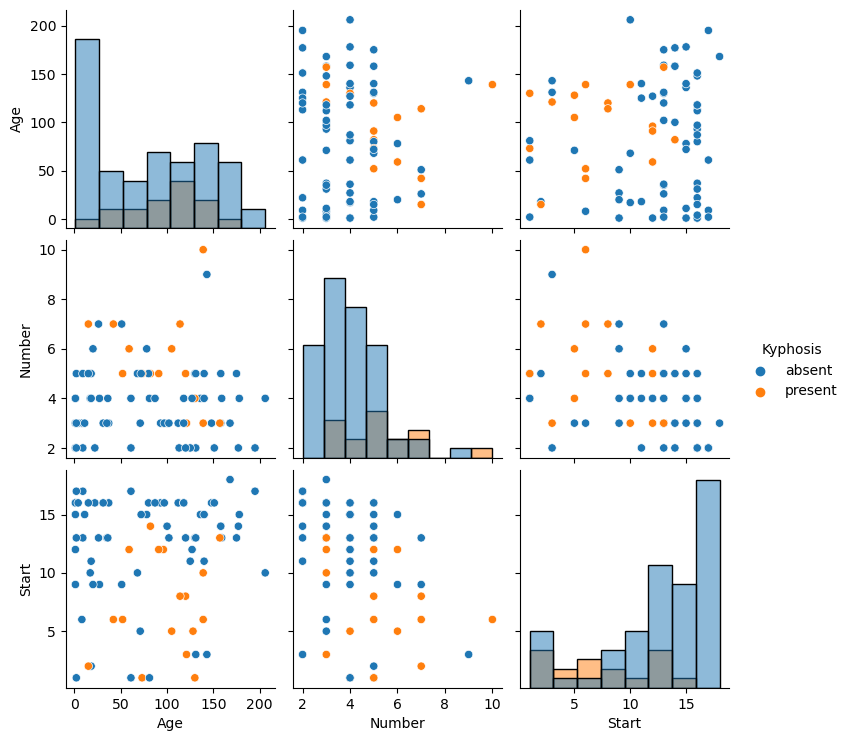

In [14]:
sns.pairplot(df, hue="Kyphosis", diag_kind="hist")

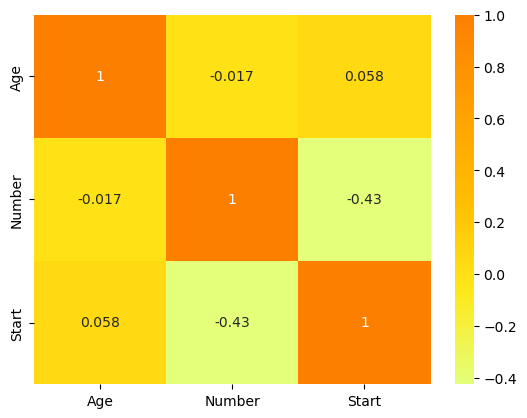

In [17]:
# Pearson Correlation
sns.heatmap(df.corr(), cmap="Wistia", annot=True)
corr_matrix = df.corr()

## Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop("Kyphosis", axis=1)
y = df["Kyphosis"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Decision Trees

Start just by training a single decision tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

## Prediction and Evaluation

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.74      0.74      0.74        19
     present       0.17      0.17      0.17         6

    accuracy                           0.60        25
   macro avg       0.45      0.45      0.45        25
weighted avg       0.60      0.60      0.60        25



In [14]:
print(confusion_matrix(y_test, predictions))

[[14  5]
 [ 5  1]]


## Tree Visualization

Just an visualization example of what the Tree executes

In [16]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

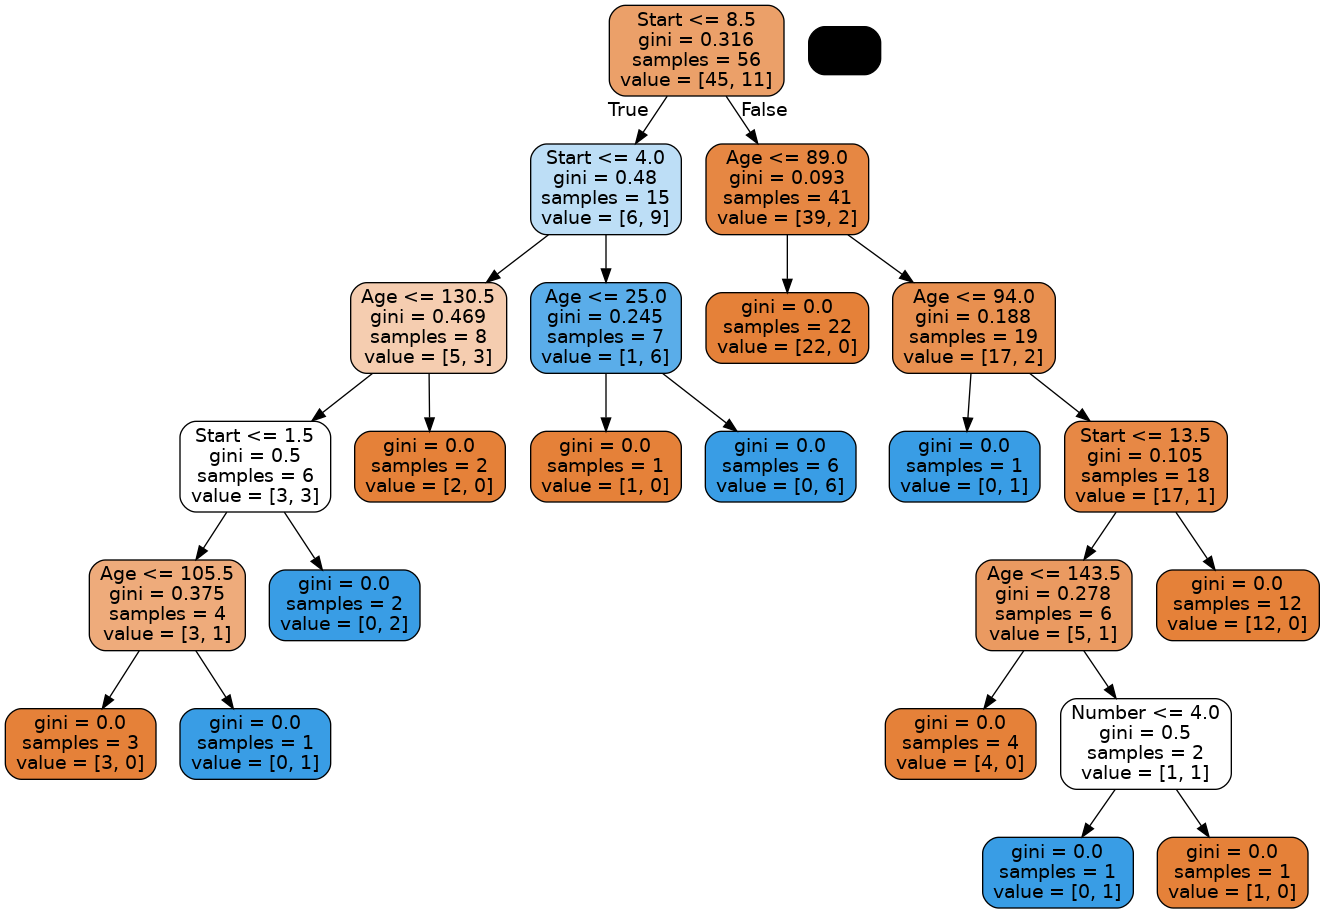

In [19]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names=features, filled=True, rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Random Forests

Now let's compare the decision tree model to a random forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
rfc = RandomForestClassifier(n_estimators=100)

In [22]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
rfc_pred = rfc.predict(X_test)

In [24]:
print(confusion_matrix(y_test, rfc_pred))

[[19  0]
 [ 5  1]]


In [25]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.79      1.00      0.88        19
     present       1.00      0.17      0.29         6

    accuracy                           0.80        25
   macro avg       0.90      0.58      0.58        25
weighted avg       0.84      0.80      0.74        25

